In [18]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    
import warnings
warnings.filterwarnings('ignore')

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [6]:
cars_df = pd.read_csv("cars-dataset.csv")
cars_df.shape

(398, 8)

In [7]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [9]:
cars_df.head(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190,3850,8.5,70,15.0


In [10]:
cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [11]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [12]:
print (cars_df.isna().sum())

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64


In [13]:
cars_df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [14]:
cars_df = cars_df.replace('?', np.nan)

In [34]:
cars_df['hp'] = cars_df['hp'].astype('float')

In [35]:
cars_df = cars_df.fillna(cars_df.median())

In [ ]:
cars_df.drop(['car name'], axis=1, inplace=True)

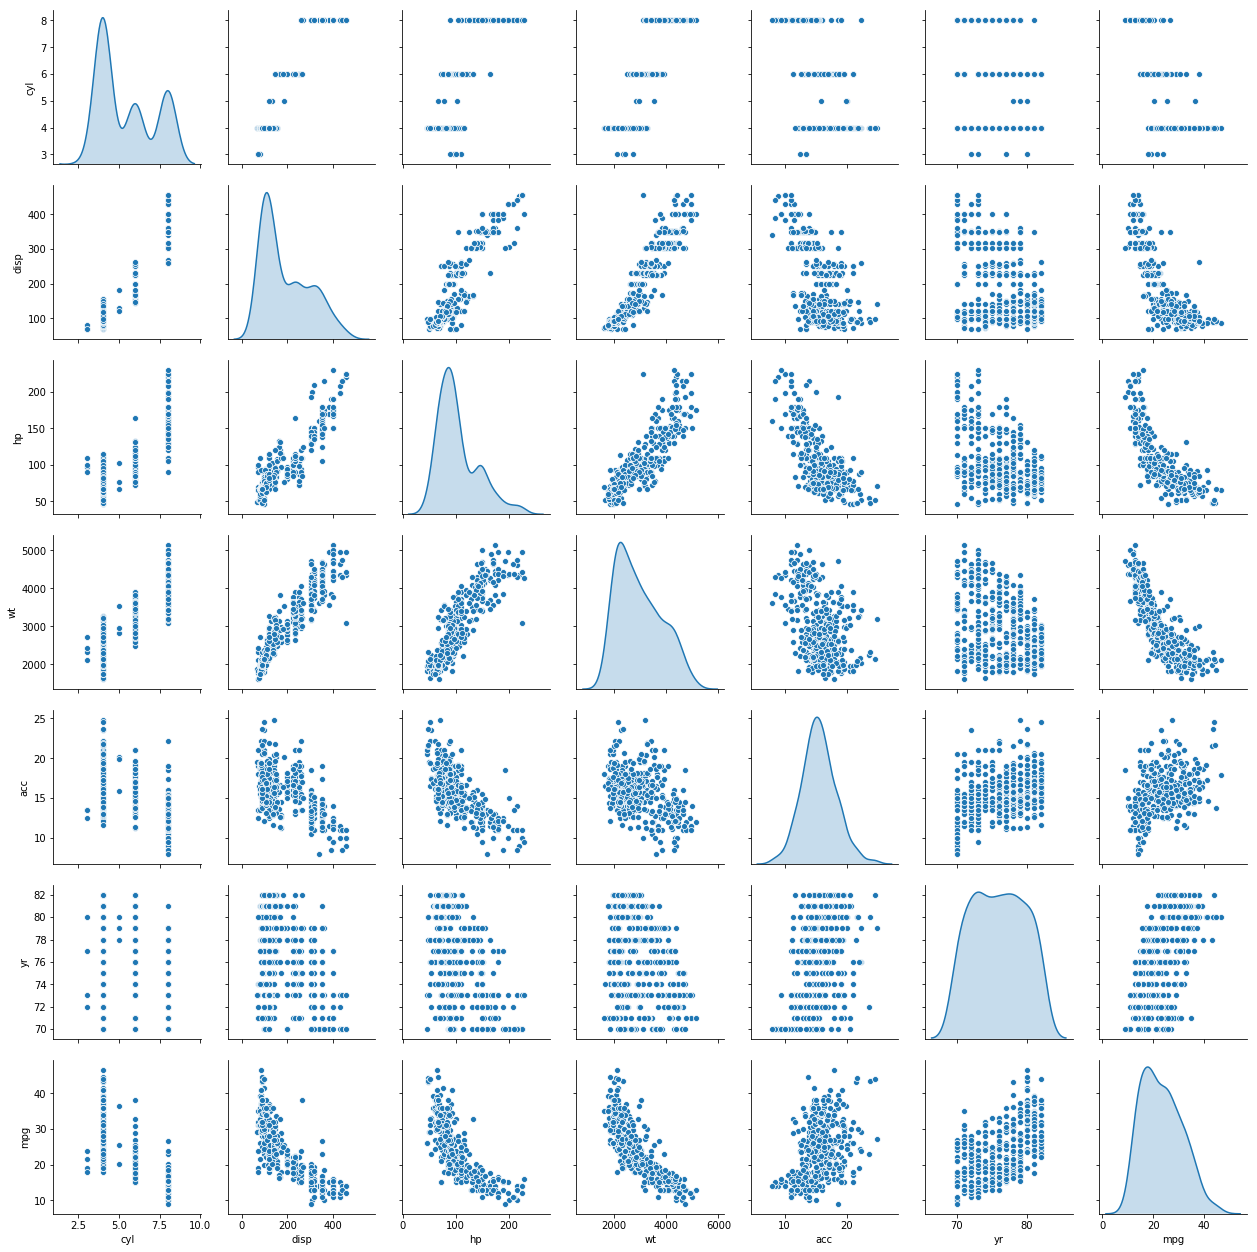

In [36]:
sns.pairplot(data=cars_df,diag_kind='kde')
plt.show()

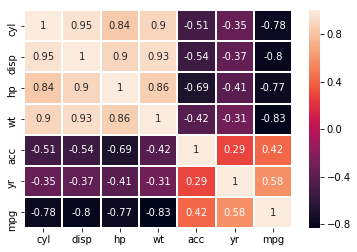

In [37]:

sns.heatmap(cars_df.corr(), annot=True, linewidths=1)

As from the KDE pair plot it is evident that there are atleast 3 clusters.

# Standardization

In [38]:
from scipy.stats import zscore
cars_df[["hp"]] =cars_df[["hp"]].apply(pd.to_numeric)
cars_df.info()
cars_df_z = cars_df.apply(zscore)
cars_df_z.pop('yr')
array = cars_df_z.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


In [39]:
cars_df_z.head()

,cyl,disp,hp,wt,acc,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543


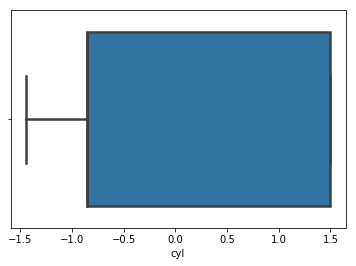

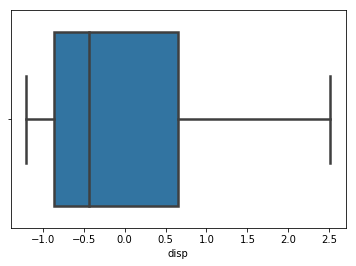

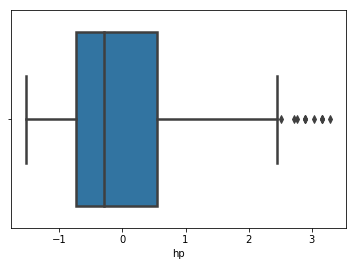

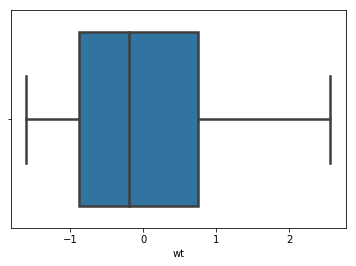

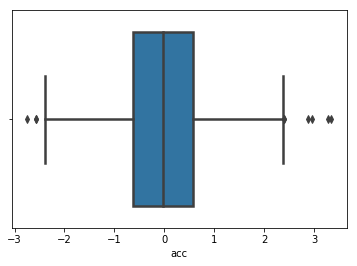

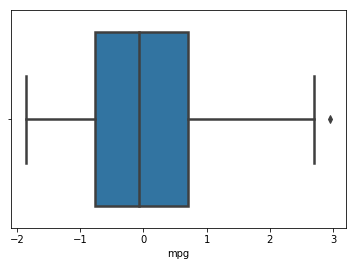

In [40]:
for i, col in enumerate(cars_df_z):
    plt.figure(i)
    sns.boxplot(cars_df_z[col],linewidth=2.5)

# KMeans Clustering

In [41]:
from sklearn.cluster import KMeans

cluster_range = range( 2, 8)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 8, random_state=1)
  clusters.fit(cars_df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,944.289955
1,3,609.265388
2,4,492.519413
3,5,423.323816
4,6,366.479312
5,7,333.866105


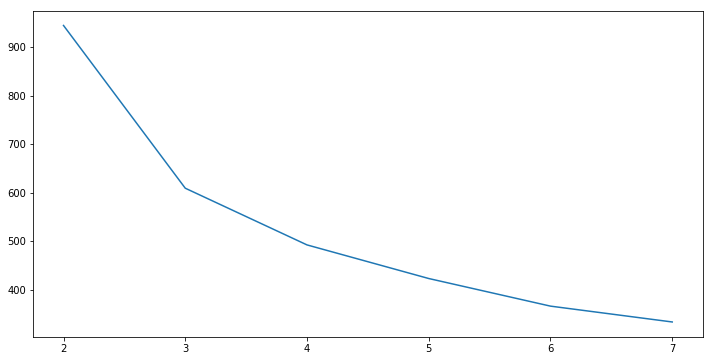

In [43]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors)

In [44]:
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(cars_df_z)
cars_df_z_copy = cars_df_z.copy(deep = True) 
from collections import Counter, defaultdict
print (Counter(cluster.labels_))
centroids = cluster.cluster_centers_

Counter({0: 133, 1: 97, 3: 87, 2: 81})


In [45]:
centroid_df = pd.DataFrame(centroids, columns = list(cars_df_z) )
prediction=cluster.predict(cars_df_z)
cars_df_z["GROUP"] = prediction

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168306BA710>,
      dtype=object)

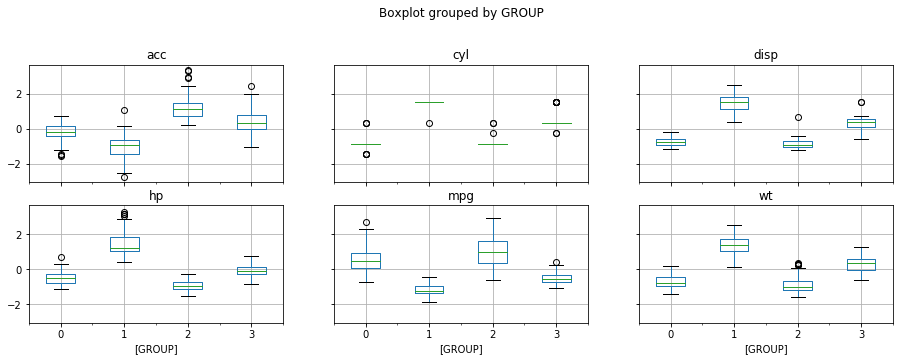

In [46]:
cars_df_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 10))

Many outliers in all attributes 

In [47]:
# Addressing outliers at group level

data = cars_df_z

def replace(group):
    median, std = group.median(), group.std() 
    outliers = (group - median).abs() > 2*std 
    group[outliers] = group.median()
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(cars_df_z['GROUP']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001682E9F0DD8>,
      dtype=object)

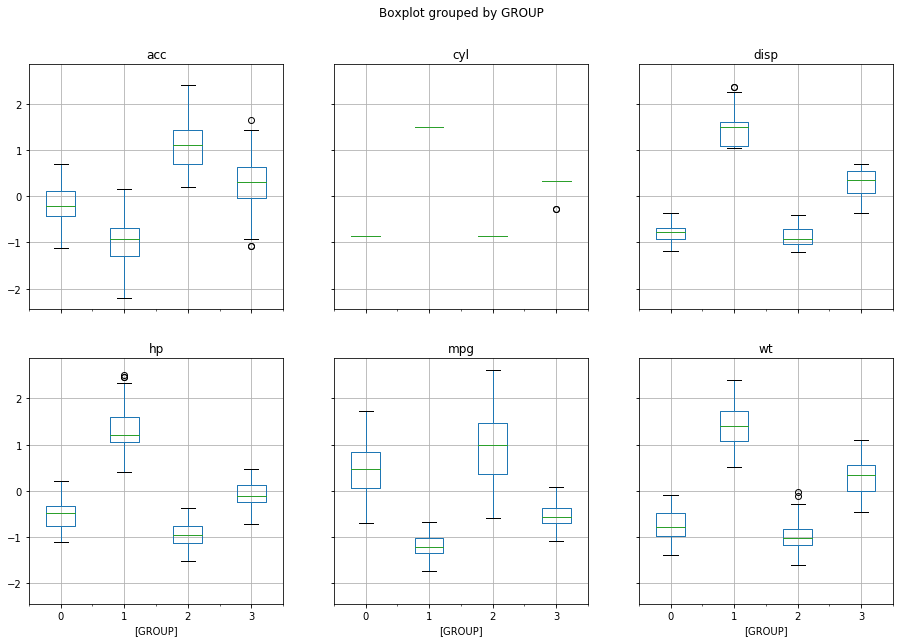

In [48]:
concat_data.boxplot(by = 'GROUP', layout=(2,3), figsize=(15, 10))

In [49]:
df_GBSplit = cars_df_z.groupby('GROUP')
#[df_GBSplit.get_group(x) for x in df_GBSplit.groups]

Group = []
Shape = []
for x in df_GBSplit.groups:
    Group.append(x)
    Shape.append(df_GBSplit.get_group(x).shape)

GroupDetails_df = pd.DataFrame( { "Group":Group, "Shape": Shape} )
GroupDetails_df 

,Group,Shape
0,0,"(133, 7)"
1,1,"(97, 7)"
2,2,"(81, 7)"
3,3,"(87, 7)"


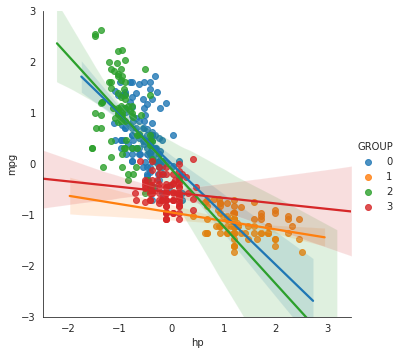

In [50]:
# mpg Vs hp

var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

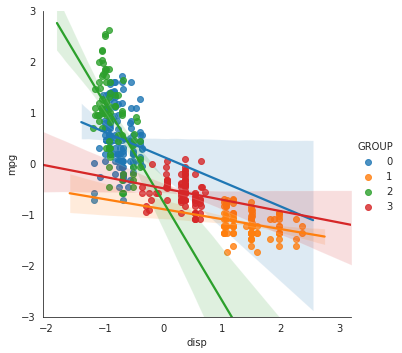

In [51]:
# mpg Vs disp
var = 'disp'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

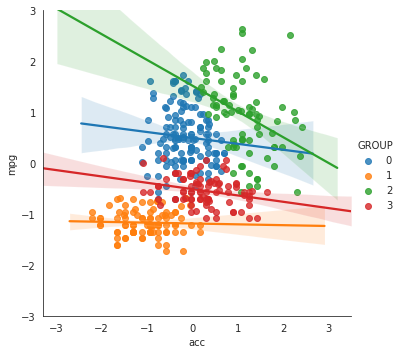

In [52]:
# mpg Vs acc
var = 'acc'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

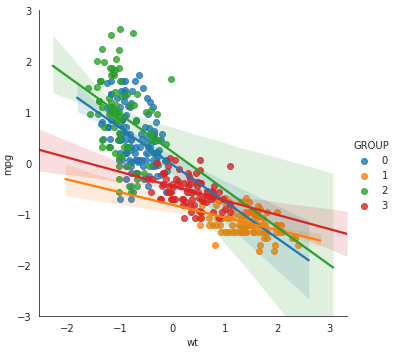

In [53]:
# mpg Vs wt
var = 'wt'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

# Use linear regression model on different clusters separately and print the coefficients of the models individually

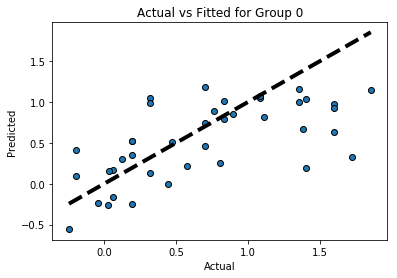

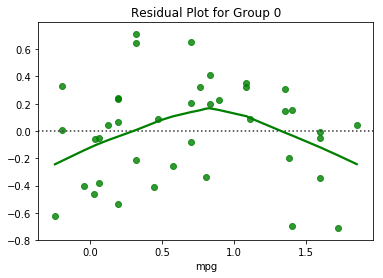

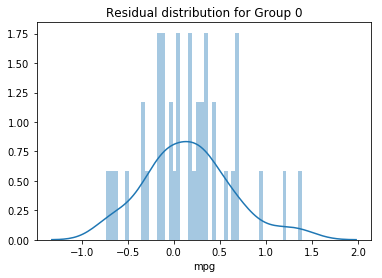

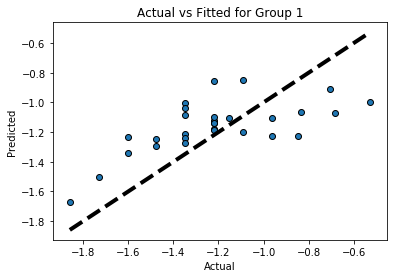

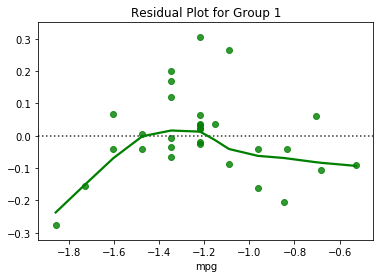

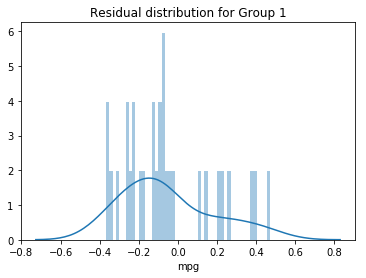

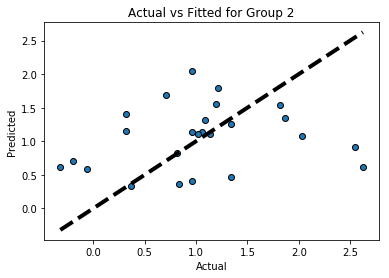

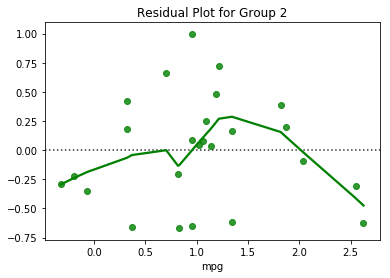

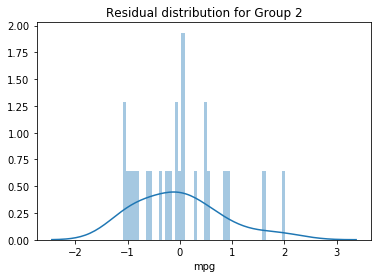

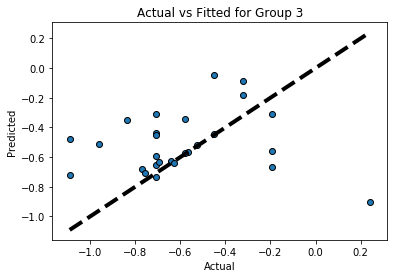

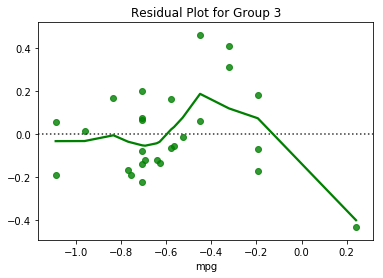

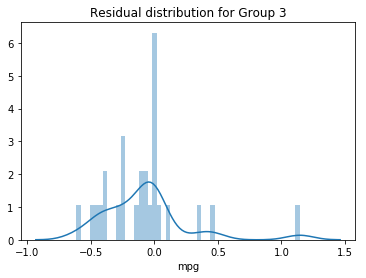

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Group = []
Coeff = []
Intercept = []
#Train_Accuracy = []
#Test_Accuracy = []
RSquared = []
RMSE = []
i = 0

for x in df_GBSplit.groups:
    df = df_GBSplit.get_group(x)
    X = df.drop(['mpg','GROUP'], axis=1)
    Y = df['mpg']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=7)
    lm = LinearRegression()
    lm.fit(X_train,Y_train)
    predictions = lm.predict(X_test)
    Group.append(x)
    Coeff.append(lm.coef_)
    Intercept.append(lm.intercept_)
    #Train_Accuracy.append(lm.score(X_train,Y_train))
    #Test_Accuracy.append(lm.score(X_test,Y_test))
    RSquared.append(metrics.r2_score(Y_test,predictions))
    RMSE.append(np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

    plt.figure(i)
    plt.scatter(Y_test, predictions, edgecolors=(0, 0, 0))
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
    plt.title('Actual vs Fitted for Group ' + str(x))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    i = i + 1

    plt.figure(i)
    plt.title('Residual Plot for Group ' + str(x))
    sns.residplot(Y_test, predictions, lowess=True, color="g")
    i = i + 1

    plt.figure(i)
    plt.title('Residual distribution for Group ' + str(x))
    sns.distplot((Y_test-predictions),bins=50);
    i = i + 1

In [55]:
Coeff_df = pd.DataFrame(Coeff, columns = X_train.columns)
Coeff_df.columns = [str(col) + '_Coeff' for col in Coeff_df.columns]
Group_df = pd.DataFrame( { "Group":Group } )
Intercept_df = pd.DataFrame( { "Intercept":Intercept } )
#Train_Accuracy_df = pd.DataFrame( { "Train_Accuracy":Train_Accuracy } )
#Test_Accuracy_df = pd.DataFrame( { "Test_Accuracy":Test_Accuracy })
RSquared_df = pd.DataFrame( { "RSquared":RSquared })
RMSE_df = pd.DataFrame( { "RMSE":RMSE })

Coeff_df['Intercept'] = Intercept_df['Intercept'].values
#Coeff_df['Train_Accuracy'] = Train_Accuracy_df['Train_Accuracy'].values
#Coeff_df['Test_Accuracy'] = Test_Accuracy_df['Test_Accuracy'].values
Coeff_df['RSquared'] = RSquared_df['RSquared'].values
Coeff_df['RMSE'] = RMSE_df['RMSE'].values
Coeff_df['GROUP'] = Group_df['Group'].values
Cols = Coeff_df.columns.tolist()
Cols = Cols[-1:] + Cols[:-1]
#Coeff_df = pd.concat([Group_df, Train_Accuracy_df, Test_Accuracy_df, Intercept_df, Coeff_df])
Coeff_df = Coeff_df[Cols]
Coeff_df

,GROUP,cyl_Coeff,disp_Coeff,hp_Coeff,wt_Coeff,acc_Coeff,Intercept,RSquared,RMSE
0,0,0.795413,0.381656,-1.054628,-0.420812,-0.299552,0.616898,0.317409,0.495495
1,1,-0.344252,0.068177,-0.204128,-0.136895,-0.114478,-0.347734,0.386527,0.234186
2,2,1.017900,-0.463678,-1.233252,-0.004399,-0.456176,0.854844,-0.171733,0.799284
3,3,0.482215,-0.064922,0.124708,-0.508761,0.099033,-0.517773,-0.476406,0.347334
